## Installing Packages

In [1]:
pip install lime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install shap xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install shap --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importing Library

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.datasets
import sklearn.ensemble
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from imblearn.over_sampling import SMOTE
from __future__ import print_function
import xgboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import shap
# Set seed for reproducibility
np.random.seed(1)

## Importing Data

In [8]:
data = pd.read_excel('bankruptcydata.xlsx')
originalFeatures = data.columns
print('originalFeatures count', len(originalFeatures))
print('originalFeatures', originalFeatures)
print(data.head())

originalFeatures count 96
originalFeatures Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan Â¥)',
       ' Operating Profit Per Share (Yuan Â¥)',
       ' Per Share Net profit before tax (Yuan Â¥)',
       ' Realized Sales Gross 

## Missing Values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [10]:
data.shape

(6819, 96)

In [11]:
print(data.isnull().values.any())

False


## Descriptive Statistics 

In [12]:
statistics = data.describe()
statistics.T.head(50)

count          mean  \
Bankrupt?                                           6819.0  3.226280e-02   
 ROA(C) before interest and depreciation before...  6819.0  5.051796e-01   
 ROA(A) before interest and % after tax             6819.0  5.586249e-01   
 ROA(B) before interest and depreciation after tax  6819.0  5.535887e-01   
 Operating Gross Margin                             6819.0  6.079480e-01   
 Realized Sales Gross Margin                        6819.0  6.079295e-01   
 Operating Profit Rate                              6819.0  9.987551e-01   
 Pre-tax net Interest Rate                          6819.0  7.971898e-01   
 After-tax net Interest Rate                        6819.0  8.090836e-01   
 Non-industry income and expenditure/revenue        6819.0  3.036229e-01   
 Continuous interest rate (after tax)               6819.0  7.813814e-01   
 Operating Expense Rate                             6819.0  1.995347e+09   
 Research and development expense rate              6819.0  1.950427e+09   
 Cash flow rate                                     6819.0  4.674312e-01   
 Interest-bearing debt interest rate                6819.0  1.644801e+07   
 Tax rate (A)                                       6819.0  1.150007e-01   
 Net Value Per Share (B)                            6819.0  1.906606e-01   
 Net Value Per Share (A)                            6819.0  1.906332e-01   
 Net Value Per Share (C)                            6819.0  1.906724e-01   
 Persistent EPS in the Last Four Seasons            6819.0  2.288129e-01   
 Cash Flow Per Share                                6819.0  3.234819e-01   
 Revenue Per Share (Yuan Â¥)                        6819.0  1.328641e+06   
 Operating Profit Per Share (Yuan Â¥)               6819.0  1.090907e-01   
 Per Share Net profit before tax (Yuan Â¥)          6819.0  1.843606e-01   
 Realized Sales Gross Profit Growth Rate            6819.0  2.240785e-02   
 Operating Profit Growth Rate                       6819.0  8.479800e-01   
 After-tax Net Profit Growth Rate                   6819.0  6.891461e-01   
 Regular Net Profit Growth Rate                     6819.0  6.891500e-01   
 Continuous Net Profit Growth Rate                  6819.0  2.176390e-01   
 Total Asset Growth Rate                            6819.0  5.508097e+09   
 Net Value Growth Rate                              6819.0  1.566212e+06   
 Total Asset Return Growth Rate Ratio               6819.0  2.642475e-01   
 Cash Reinvestment %                                6819.0  3.796767e-01   
 Current Ratio                                      6819.0  4.032850e+05   
 Quick Ratio                                        6819.0  8.376595e+06   
 Interest Expense Ratio                             6819.0  6.309910e-01   
 Total debt/Total net worth                         6819.0  4.416337e+06   
 Debt ratio %                                       6819.0  1.131771e-01   
 Net worth/Assets                                   6819.0  8.868229e-01   
 Long-term fund suitability ratio (A)               6819.0  8.782734e-03   
 Borrowing dependency                               6819.0  3.746543e-01   
 Contingent liabilities/Net worth                   6819.0  5.968277e-03   
 Operating profit/Paid-in capital                   6819.0  1.089767e-01   
 Net profit before tax/Paid-in capital              6819.0  1.827150e-01   
 Inventory and accounts receivable/Net value        6819.0  4.024593e-01   
 Total Asset Turnover                               6819.0  1.416056e-01   
 Accounts Receivable Turnover                       6819.0  1.278971e+07   
 Average Collection Days                            6819.0  9.826221e+06   
 Inventory Turnover Rate (times)                    6819.0  2.149106e+09   
 Fixed Assets Turnover Frequency                    6819.0  1.008596e+09   

                                                             std  min  \
Bankrupt?                                           1.767102e-01  0.0   
 ROA(C) before interest and de

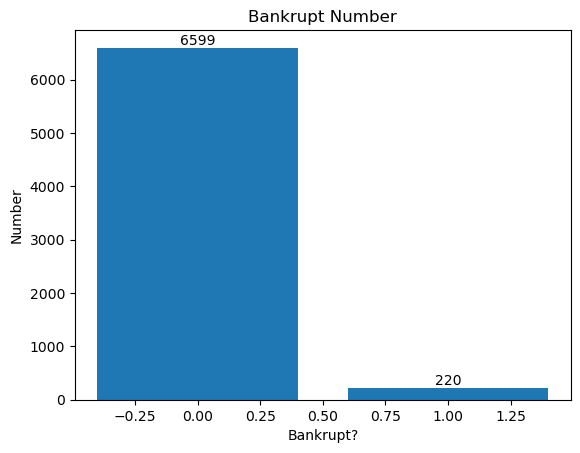

In [13]:
# bar chart for the number of bankrupt company
num_bankrupt = data['Bankrupt?'].value_counts()
plt.bar(num_bankrupt.index, num_bankrupt.values)
plt.title('Bankrupt Number')
plt.xlabel('Bankrupt?')
plt.ylabel('Number')
for index, value in enumerate(num_bankrupt.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

## Features

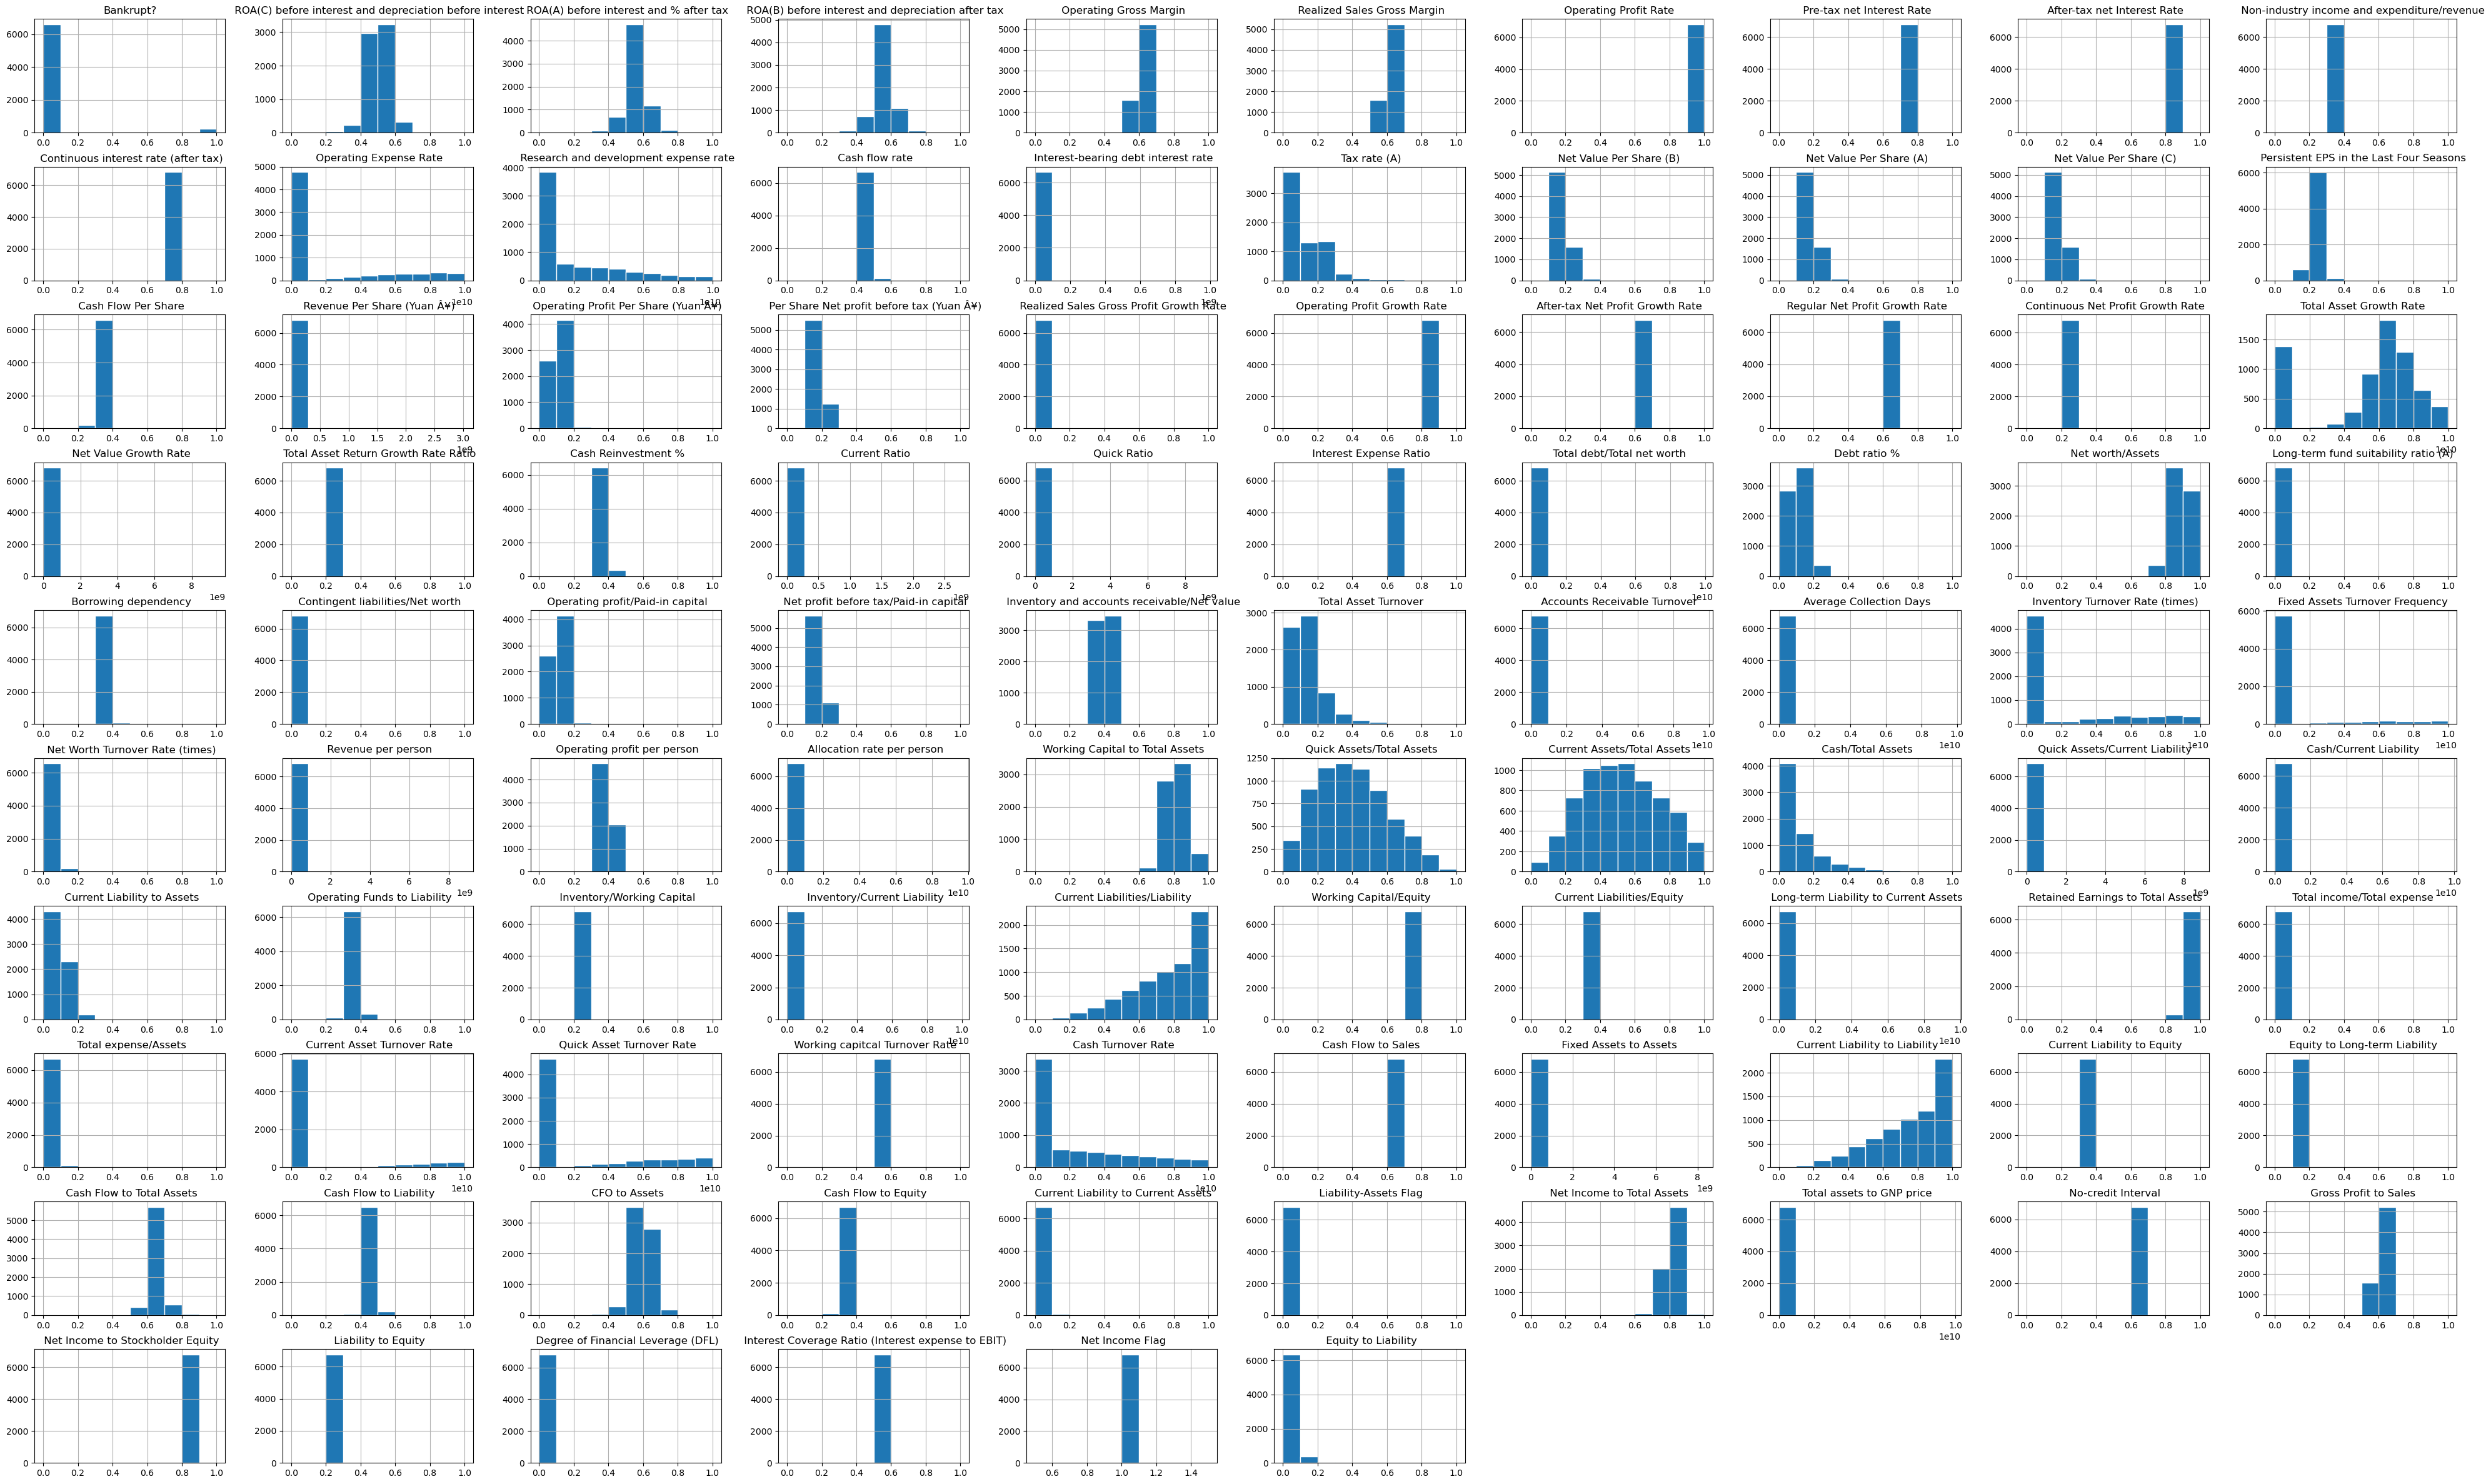

In [14]:
# Histogram for the distribution of features
data.hist(figsize=(50, 30), edgecolor='white')
plt.show()

## Correlation Matrix

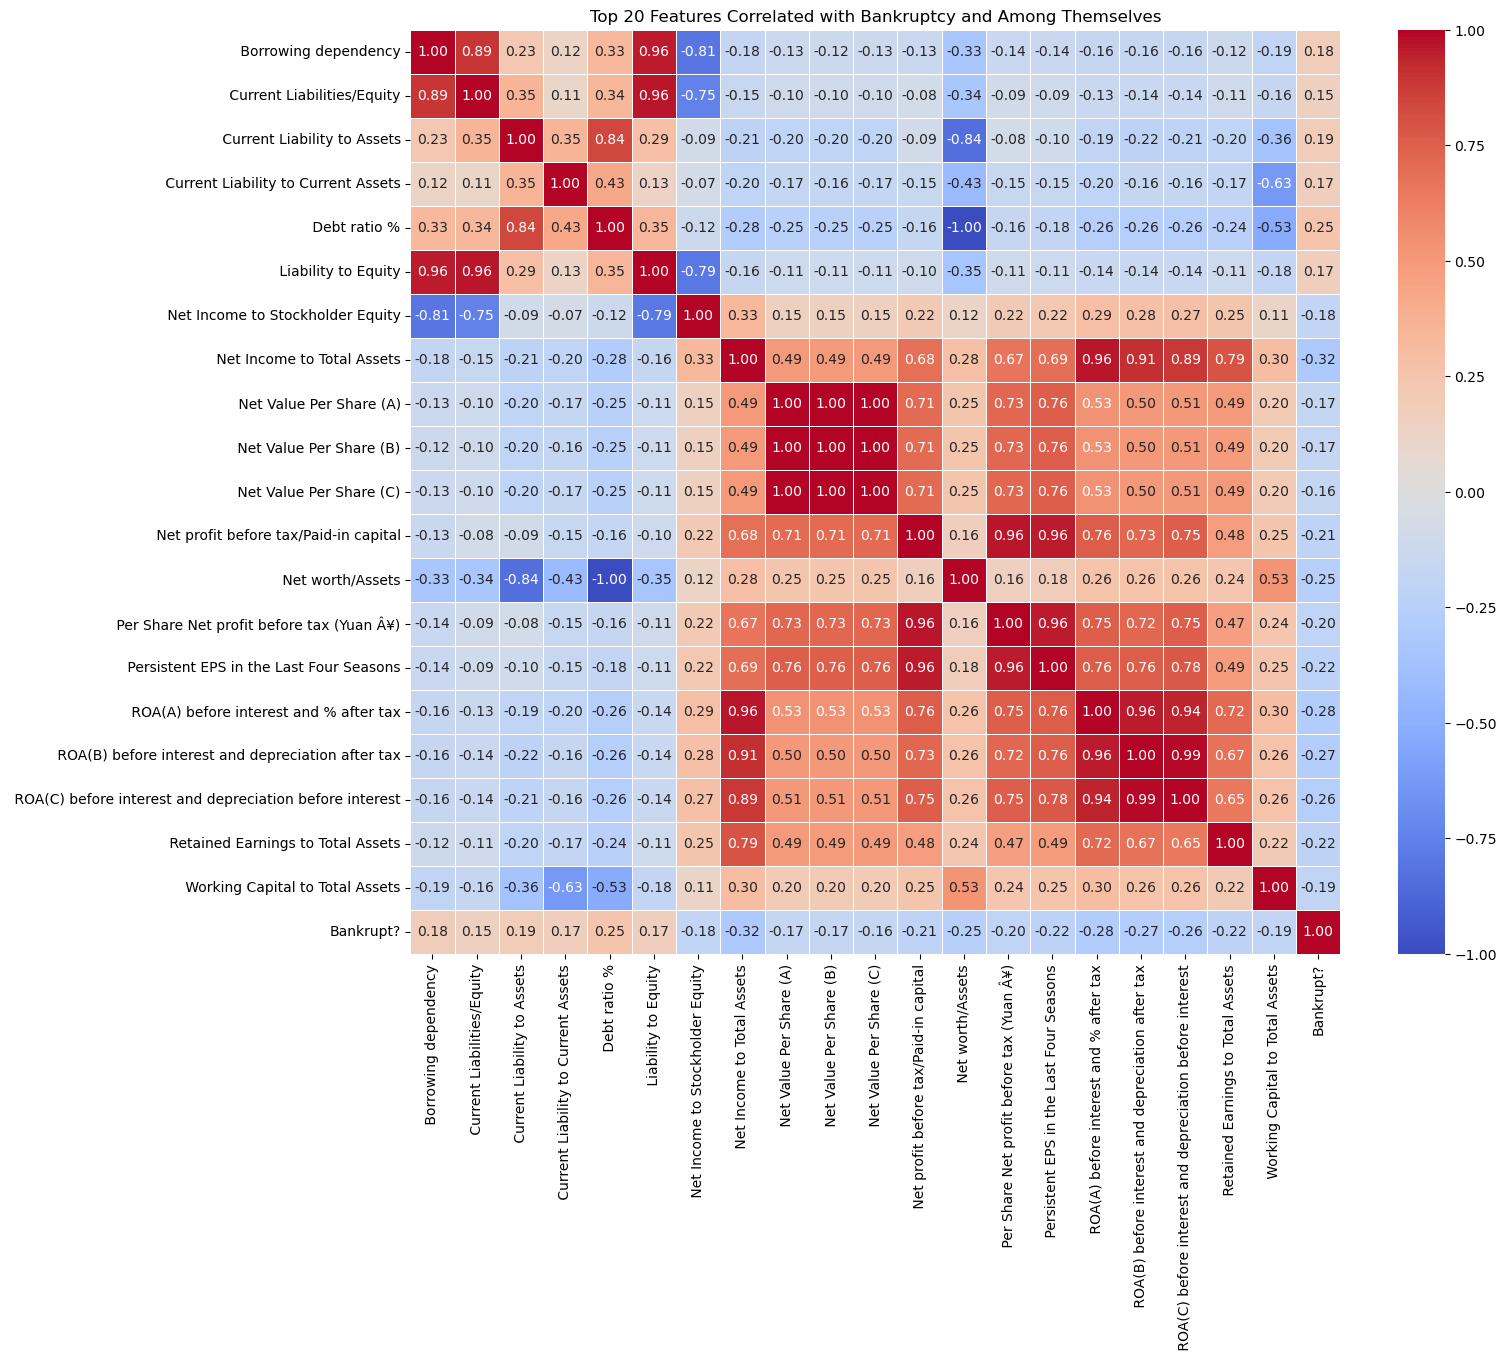

In [15]:
# Computing the correlation matrix
correlation_matrix = data.corr()

# Selecting correlations with the target variable (Bankrupt?)
target_correlation = correlation_matrix["Bankrupt?"].drop("Bankrupt?")

# Geting the top 20 features with the highest absolute correlation with the target variable
top_20_features = target_correlation.abs().nlargest(20).index

# Creating a smaller correlation matrix with these top 20 features (including target variable)
filtered_corr_matrix = correlation_matrix.loc[top_20_features.union(["Bankrupt?"]), top_20_features.union(["Bankrupt?"])]

# Plotting the heatmap for the top 20 correlated features along with their mutual correlations
plt.figure(figsize=(15, 12))
sns.heatmap(filtered_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

# Adding title
plt.title("Top 20 Features Correlated with Bankruptcy and Among Themselves")

# Showing the plot
plt.show()

In [16]:
# Selecting the most correlated features with the Bankruptcy
corr_bankruptcy = correlation_matrix['Bankrupt?'].drop('Bankrupt?')
threshold = 0.2
important_features = corr_bankruptcy[abs(corr_bankruptcy) > threshold]
print(important_features)

 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(A) before interest and % after tax                    -0.282941
 ROA(B) before interest and depreciation after tax         -0.273051
 Persistent EPS in the Last Four Seasons                   -0.219560
 Per Share Net profit before tax (Yuan Â¥)                 -0.201395
 Debt ratio %                                               0.250161
 Net worth/Assets                                          -0.250161
 Net profit before tax/Paid-in capital                     -0.207857
 Retained Earnings to Total Assets                         -0.217779
 Net Income to Total Assets                                -0.315457
Name: Bankrupt?, dtype: float64


## Univariate Feature Selection (ANOVA F-tests)

D:\Python\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [93] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
D:\Python\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Selected Features using ANOVA: Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan Â¥)', ' Debt ratio %',
       ' Net worth/Assets', ' Net profit before tax/Paid-in capital',
       ' Retained Earnings to Total Assets', ' Net Income to Total Assets'],
      dtype='object')


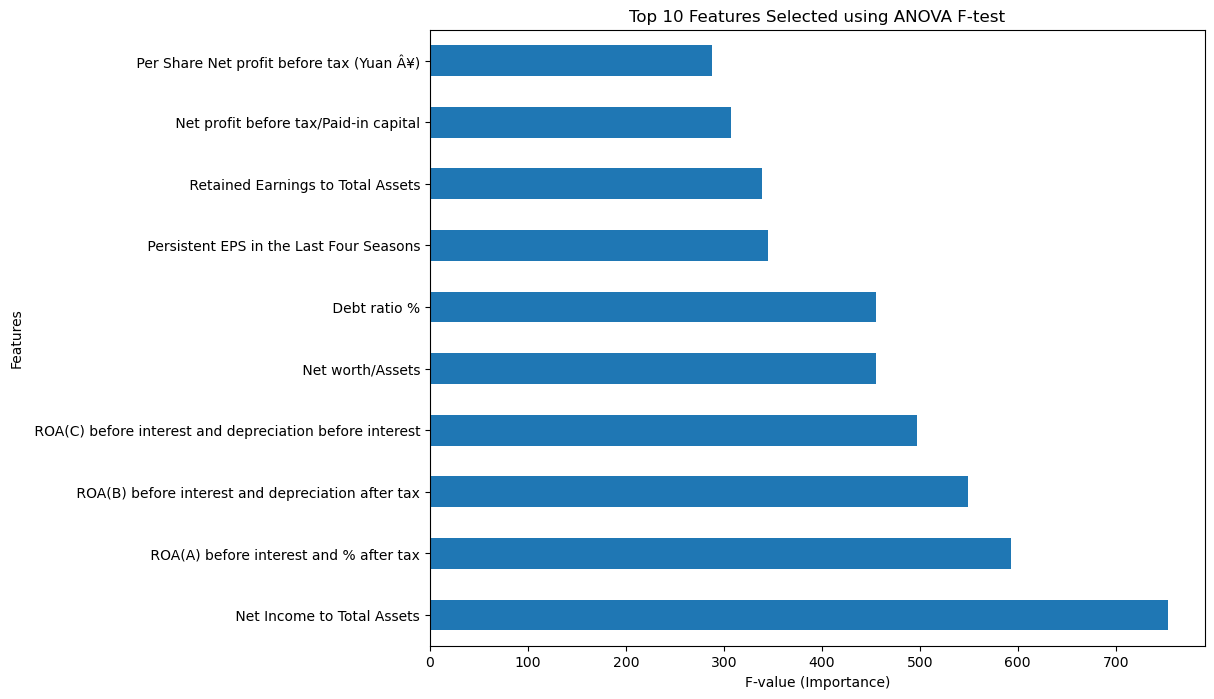

In [17]:
#Use statistical methods ANOVA F-tests for continuous features
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features and target variable
FT = data.drop(columns=['Bankrupt?'])
TR = data['Bankrupt?']

# Step 2: Univariate Feature Selection (ANOVA F-test)
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(FT, TR)
selected_features_anova = FT.columns[selector.get_support()]

# Print selected features
print("Selected Features using ANOVA:", selected_features_anova)

# Plot the scores of all features
feature_scores = pd.Series(selector.scores_, index=FT.columns)
plt.figure(figsize=(10, 8))
feature_scores.nlargest(10).plot(kind='barh')
plt.title('Top 10 Features Selected using ANOVA F-test')
plt.xlabel('F-value (Importance)')
plt.ylabel('Features')
plt.show()

## Descriptive Statistics of the important features

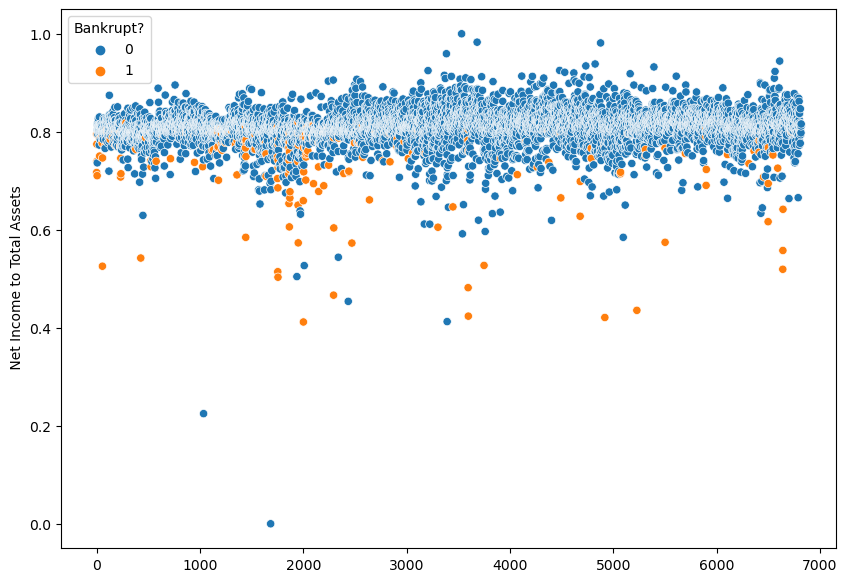

In [18]:
# Visualizing the Effect of Net Income to Total Assets on Bankruptcy using scatterplots
fig = plt.figure(figsize = (10,7))
sns.scatterplot(x = data.index ,y = ' Net Income to Total Assets', hue = 'Bankrupt?', data = data)
plt.show()

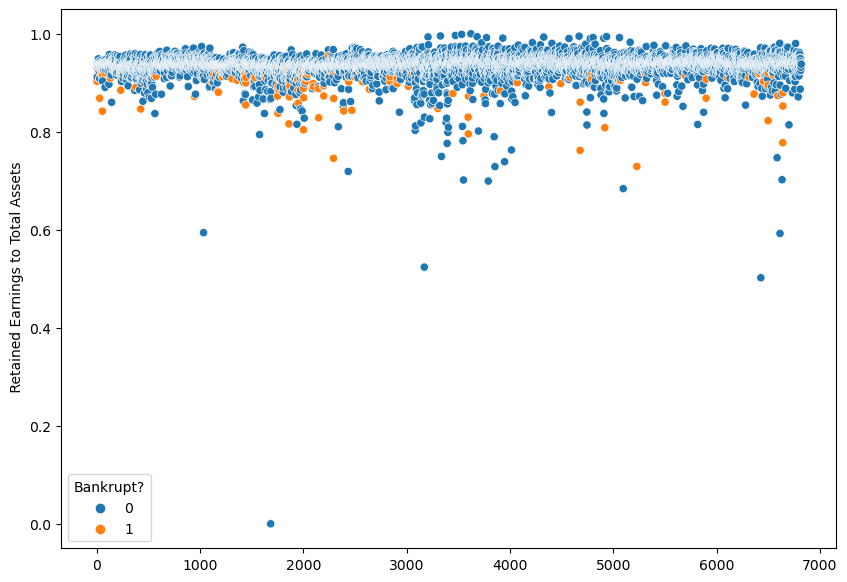

In [19]:
# Visualizing the Effect of Retained Earnings to Total Assets on Bankruptcy using scatterplots
fig = plt.figure(figsize = (10,7))
sns.scatterplot(x = data.index ,y = ' Retained Earnings to Total Assets', hue = 'Bankrupt?', data = data)
plt.show()

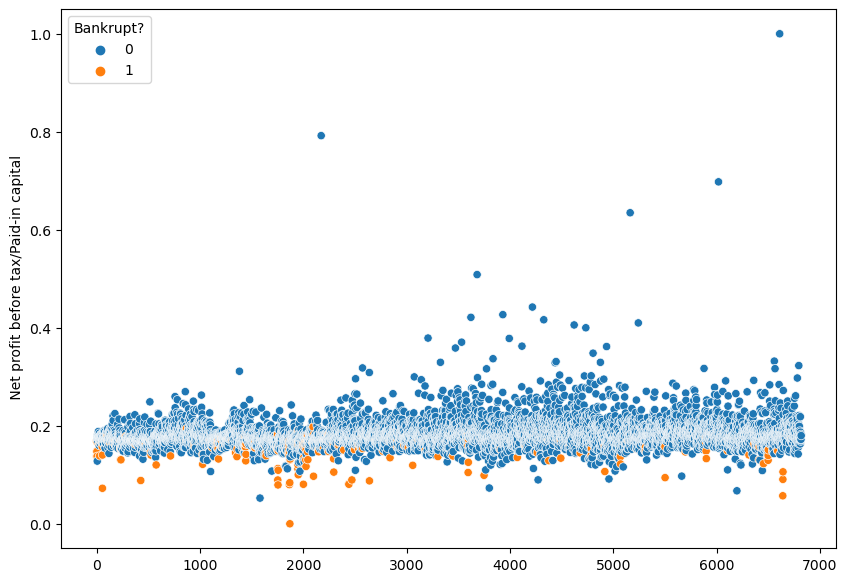

In [20]:
# Visualizing the Effect of Net profit before tax/Paid-in capital on Bankruptcy using scatterplots
fig = plt.figure(figsize = (10,7))
sns.scatterplot(x = data.index ,y = ' Net profit before tax/Paid-in capital', hue = 'Bankrupt?', data = data)
plt.show()

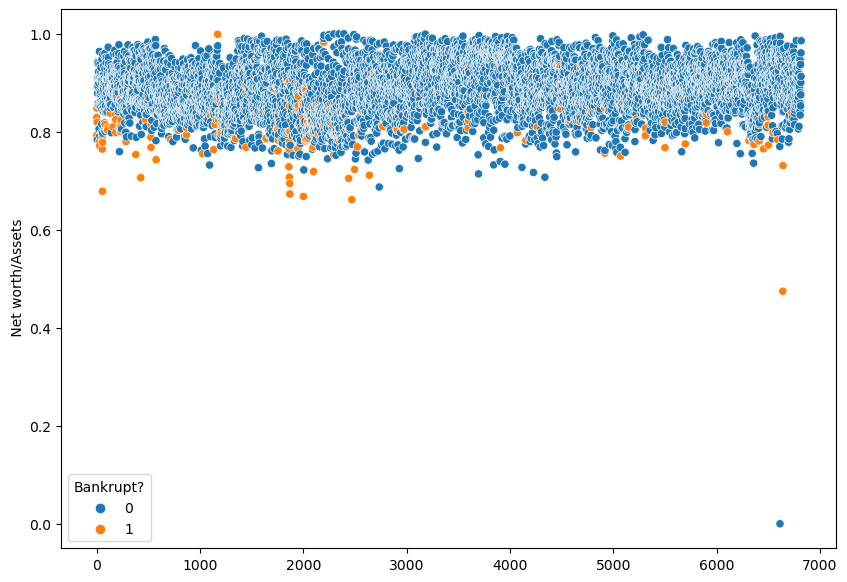

In [21]:
# Visualizing the Effect of Net worth/Assets on Bankruptcy using scatterplots
fig = plt.figure(figsize = (10,7))
sns.scatterplot(x = data.index ,y = ' Net worth/Assets', hue = 'Bankrupt?', data = data)
plt.show()

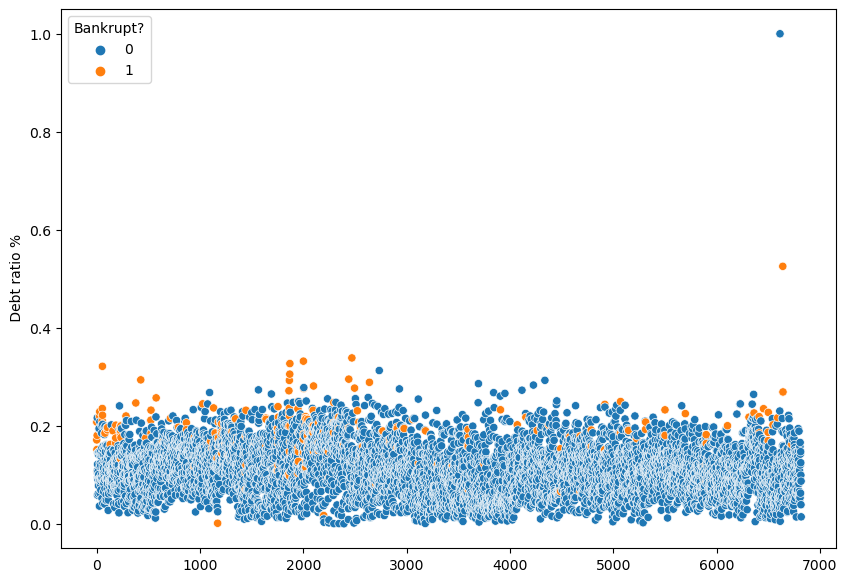

In [22]:
# Visualizing the Effect of Debt ratio % on Bankruptcy using scatterplots
fig = plt.figure(figsize = (10,7))
sns.scatterplot(x = data.index ,y = ' Debt ratio %', hue = 'Bankrupt?', data = data)
plt.show()

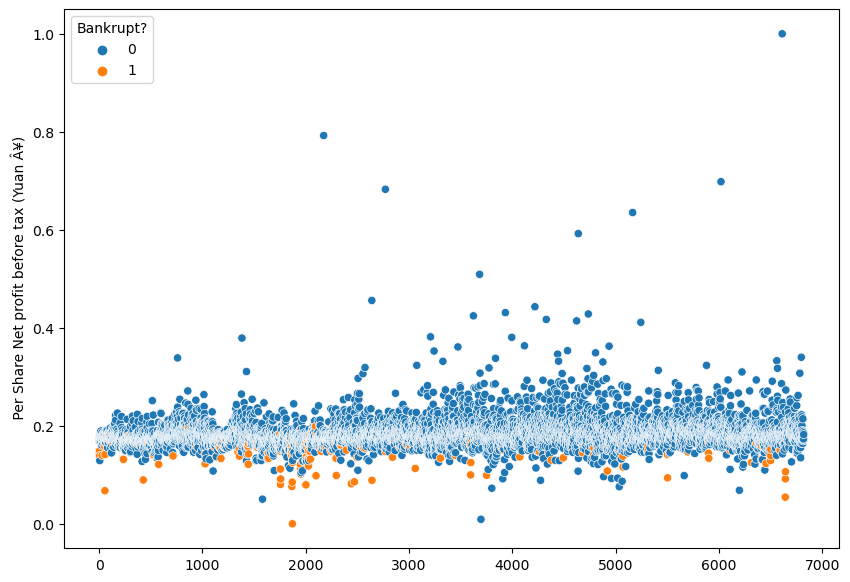

In [23]:
# Visualizing the Effect of Per Share Net profit before tax (Yuan Â¥) on Bankruptcy using scatterplots
fig = plt.figure(figsize = (10,7))
sns.scatterplot(x = data.index ,y = ' Per Share Net profit before tax (Yuan Â¥)', hue = 'Bankrupt?', data = data)
plt.show()

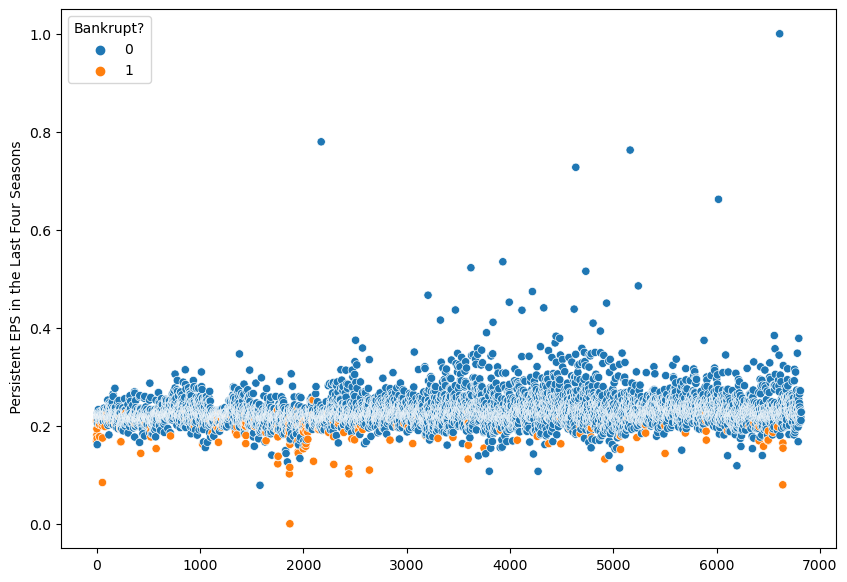

In [24]:
# Visualizing the Effect of Persistent EPS in the Last Four Seasons on Bankruptcy using scatterplots
fig = plt.figure(figsize = (10,7))
sns.scatterplot(x = data.index ,y = ' Persistent EPS in the Last Four Seasons', hue = 'Bankrupt?', data = data)
plt.show()

In [25]:
# Creating new DataFrame with the most important features
# As ROA(C), ROA(A), ROA(B) and Net Income to Total Assets(ROA) are the same features, so only one is considering
bdata = data[[' Persistent EPS in the Last Four Seasons',
              ' Per Share Net profit before tax (Yuan Â¥)',
              ' Debt ratio %',
              ' Net worth/Assets',
              ' Net profit before tax/Paid-in capital',
              ' Retained Earnings to Total Assets',
              ' Net Income to Total Assets',
              'Bankrupt?']]

## Splitting the dataset into the Training set and Test set

In [26]:
train,test=train_test_split(bdata,test_size=0.3,random_state=0,stratify = bdata['Bankrupt?'])

In [27]:
# Creating X_train,Y_train,X_test
X_train = train.drop(['Bankrupt?'], axis=1)
y_train = train['Bankrupt?']

X_test  = test.drop(['Bankrupt?'], axis=1)
y_test  = test['Bankrupt?']

In [28]:
# Applying SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [29]:
#value counts of y_train after SMOTE
y_train.value_counts()

0    4619
1    4619
Name: Bankrupt?, dtype: int64

In [30]:
#value counts of y_test after SMOTE
y_test.value_counts()

0    1980
1      66
Name: Bankrupt?, dtype: int64

## Random Forest

In [31]:
#Training the Random Forest model on the Training set
model_RF = RandomForestClassifier(random_state=42)

## Hyperparameter Tuning

In [32]:
#Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators' : [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
               'max_features' : ['log2', 'sqrt', None],
               'criterion' : ['gini', 'entropy', 'log_loss'],
               'bootstrap' : [True, False]}
grid_search_rf = GridSearchCV(estimator = model_RF,
                           param_grid = parameters,
                           scoring = 'precision',
                           cv = 3,
                           verbose = 2,
                           n_jobs = -1)
grid_search_rf.fit(X_train, y_train)
best_precision_rf = grid_search_rf.best_score_
best_parameters_rf = grid_search_rf.best_params_

print("Best precision: {:.2f} %".format(best_precision_rf*100))
print("Best Parameters:", best_parameters_rf)

Fitting 3 folds for each of 180 candidates, totalling 540 fits
Best precision: 94.17 %
Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 10}


In [33]:
# Fitting the model using the training data
model_RF = RandomForestClassifier(
                n_estimators = best_parameters_rf['n_estimators'],
                criterion = best_parameters_rf['criterion'],
                max_features = best_parameters_rf['max_features'],
                bootstrap = best_parameters_rf['bootstrap'], 
                class_weight='balanced', 
                random_state=42)

model_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       max_features='log2', n_estimators=10, random_state=42)

## Evaluation Matrics 

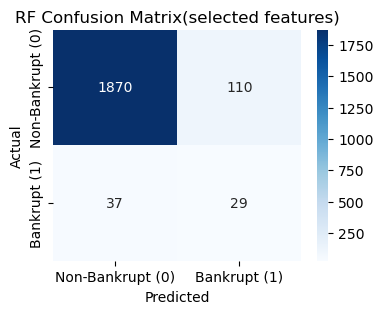

In [34]:
#Making the Confusion Matrix
y_pred_RF = model_RF.predict(X_test)
cm = confusion_matrix(y_test, y_pred_RF)

# Plotting the confusion matrix using Seaborn heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Bankrupt (0)", "Bankrupt (1)"], 
            yticklabels=["Non-Bankrupt (0)", "Bankrupt (1)"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RF Confusion Matrix(selected features)')
plt.show()

In [35]:
# Model evaluation with classification report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1980
           1       0.21      0.44      0.28        66

    accuracy                           0.93      2046
   macro avg       0.59      0.69      0.62      2046
weighted avg       0.96      0.93      0.94      2046



In [36]:
# Model evaluation with ROC AUC and PR AUC 
# Predicting on the test set
y_pred_prob = model_RF.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.3f}")

# Precision-Recall Curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.3f}")

ROC-AUC Score: 0.829
Precision-Recall AUC: 0.235


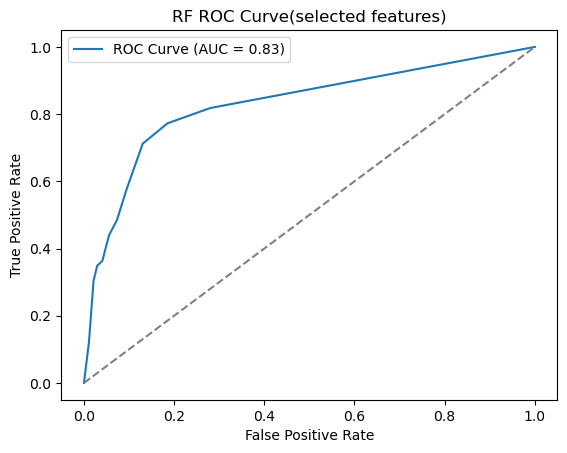

In [37]:
# Plotting ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random Guessing Line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF ROC Curve(selected features)')
plt.legend()
plt.show()

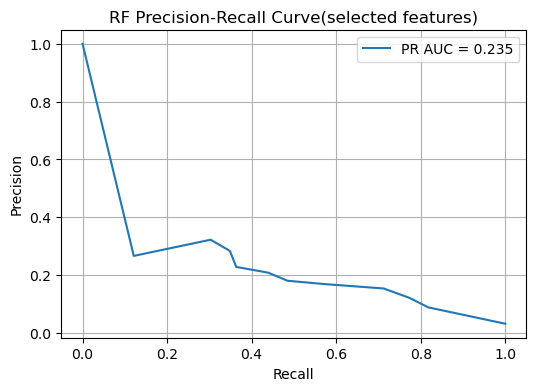

In [38]:
# Plotting Precision-Recall AUC Curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("RF Precision-Recall Curve(selected features)")
plt.legend()
plt.grid()
plt.show()

## K-Fold Cross-Validation 

In [39]:
# Defining k-Fold Cross-Validation
k = 10
cv = KFold(n_splits=k, shuffle=True, random_state=42)

# Performing k-Fold Cross-Validation
cv_scores = cross_val_score(estimator=model_RF, X=X_train, y=y_train, cv=cv, scoring = 'recall')

# Computing Mean & Standard Deviation
mean_score = np.mean(cv_scores)
std_dev = np.std(cv_scores)

print(f'recall: {mean_score:.4f} ± {std_dev:.4f}')

recall: 0.9589 ± 0.0103


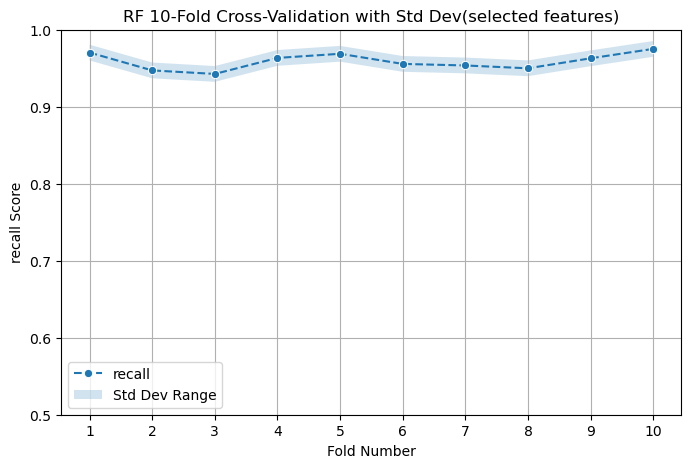

In [40]:
# Plotting Recall Scores with Standard Deviation
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, k+1), y=cv_scores, marker="o", linestyle="dashed", label="CV Score")
plt.fill_between(range(1, k+1), cv_scores - std_dev, cv_scores + std_dev, alpha=0.2)

plt.xlabel("Fold Number")
plt.ylabel("recall Score")
plt.title(f"RF {k}-Fold Cross-Validation with Std Dev(selected features)")
plt.xticks(range(1, k+1))
plt.ylim(0.5, 1)
plt.legend(["recall", "Std Dev Range"])
plt.grid()
plt.show()

D:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


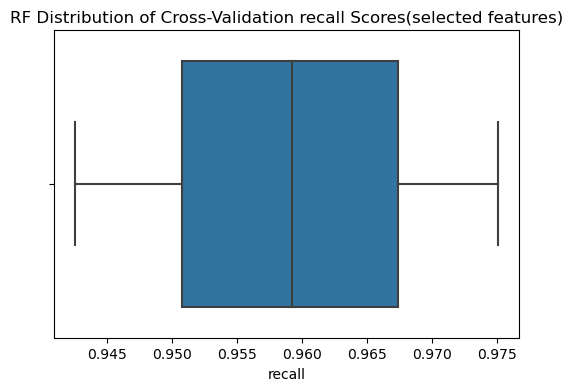

In [41]:
#Box Plot of k-Fold Scores
plt.figure(figsize=(6, 4))
sns.boxplot(cv_scores)
plt.title("RF Distribution of Cross-Validation recall Scores(selected features)")
plt.xlabel("recall")
plt.show()

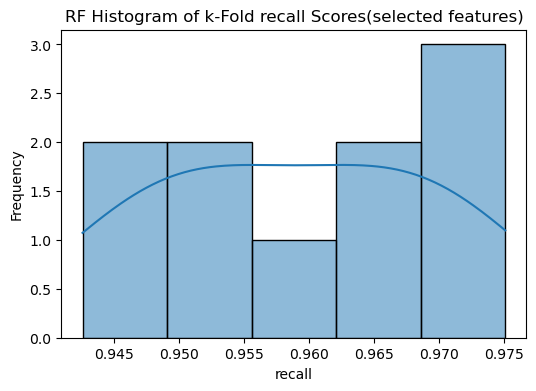

In [42]:
# Histogram of Cross-Validation Scores
plt.figure(figsize=(6, 4))
sns.histplot(cv_scores, bins=5, kde=True)
plt.title("RF Histogram of k-Fold recall Scores(selected features)")
plt.xlabel("recall")
plt.ylabel("Frequency")
plt.show()

## Use the SHAP explainer to explain predictions

In [43]:
# Creating Tree Explainer object that can calculate shap values
explainer_RF = shap.TreeExplainer(model_RF)

## Instance-Level Explanation (Force Plot)

In [44]:
# Creating a mask
sample_RF_X1 = (y_test == 1) & (y_pred_RF == 1)

# Extracting the rows from the test dataset where the sample is True
sample_RF_1 = X_test[sample_RF_X1]

print(sample_RF_1)

       Persistent EPS in the Last Four Seasons  \
3183                                  0.179824   
1638                                  0.195802   
2023                                  0.213009   
1951                                  0.143992   
2046                                  0.216886   
1759                                  0.201002   
1753                                  0.122341   
5070                                  0.151744   
715                                   0.179257   
1867                                  0.186064   
5                                     0.174435   
2344                                  0.211024   
2001                                  0.190224   
525                                   0.177271   
6105                                  0.189468   
3749                                  0.154392   
2000                                  0.153068   
1446                                  0.205635   
2148                                  0.193060   


In [45]:
#choosing some instances from the test dataset
X_test.loc[[3183]]

Persistent EPS in the Last Four Seasons  \
3183                                  0.179824   

       Per Share Net profit before tax (Yuan Â¥)   Debt ratio %  \
3183                                    0.147548       0.189618   

       Net worth/Assets   Net profit before tax/Paid-in capital  \
3183           0.810382                                0.150019   

       Retained Earnings to Total Assets   Net Income to Total Assets  
3183                            0.908377                      0.75613

In [46]:
#Calculating Shap values example 3183
selected_instance_RF1 = X_test.loc[[3183]]
shap_values_RF1 = explainer_RF.shap_values(selected_instance_RF1)
shap.initjs()
shap.force_plot(explainer_RF.expected_value[1], shap_values_RF1[0, :, 1], selected_instance_RF1)

In [47]:
# Creating a mask for True Positives
sample_RF_X2 = (y_test == 0) & (y_pred_RF == 1)

# Extracting the rows from the test dataset where the mask is True
sample_RF_2 = X_test[sample_RF_X2]

print(sample_RF_2)

       Persistent EPS in the Last Four Seasons  \
2429                                  0.209606   
3898                                  0.198639   
4227                                  0.142384   
1235                                  0.219249   
3146                                  0.205824   
...                                        ...   
3894                                  0.197599   
5090                                  0.235322   
2017                                  0.211780   
5017                                  0.152501   
13                                    0.212915   

       Per Share Net profit before tax (Yuan Â¥)   Debt ratio %  \
2429                                    0.167206       0.117423   
3898                                    0.157490       0.172234   
4227                                    0.113956       0.283067   
1235                                    0.174060       0.136742   
3146                                    0.161859       0.004112 

In [48]:
#choosing some instances from the test dataset
X_test.loc[[3898]]

Persistent EPS in the Last Four Seasons  \
3898                                  0.198639   

       Per Share Net profit before tax (Yuan Â¥)   Debt ratio %  \
3898                                     0.15749       0.172234   

       Net worth/Assets   Net profit before tax/Paid-in capital  \
3898           0.827766                                0.156972   

       Retained Earnings to Total Assets   Net Income to Total Assets  
3898                            0.922576                     0.768514

In [49]:
#Calculating Shap values example 3898
selected_instance_RF2 = X_test.loc[[3898]]
shap_values_RF2 = explainer_RF.shap_values(selected_instance_RF2)
shap.initjs()
shap.force_plot(explainer_RF.expected_value[1], shap_values_RF2[0, :, 1], selected_instance_RF2)

## Global Feature Importance

### Summary Plot

In [50]:
#SHAP values for the test dataset
shap_values_RF = explainer_RF.shap_values(X_test)

In [51]:
# Converting 3D SHAP values to 2D by subtracting Class 0 SHAP values from Class 1
shap_values_RF = shap_values_RF[:, :, 1] - shap_values_RF[:, :, 0]

# Verifying the new shape matches XGBoost's format
print("Converted SHAP Values Shape:", shap_values_RF.shape)

Converted SHAP Values Shape: (2046, 7)


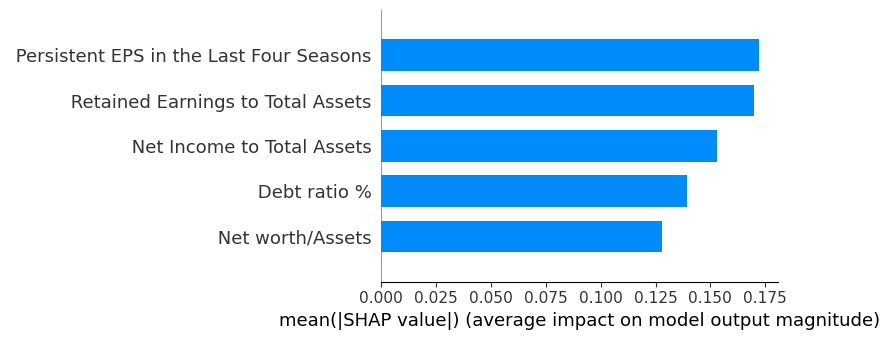

In [52]:
# Getting the top 5 features based on their importance (mean SHAP value or other metric)
top_5_features = np.abs(shap_values_RF).mean(axis=0).argsort()[-5:][::-1]

# Plotting the summary plot for the top 5 features only
shap.summary_plot(shap_values_RF[:, top_5_features], X_test.iloc[:, top_5_features], plot_type="bar")

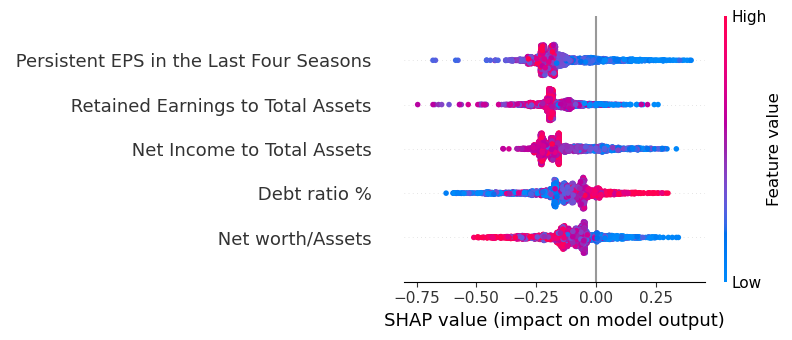

In [53]:
#summary plot for features distribution
shap.summary_plot(shap_values_RF[:, top_5_features], X_test.iloc[:, top_5_features])

## SHAP dependence plot

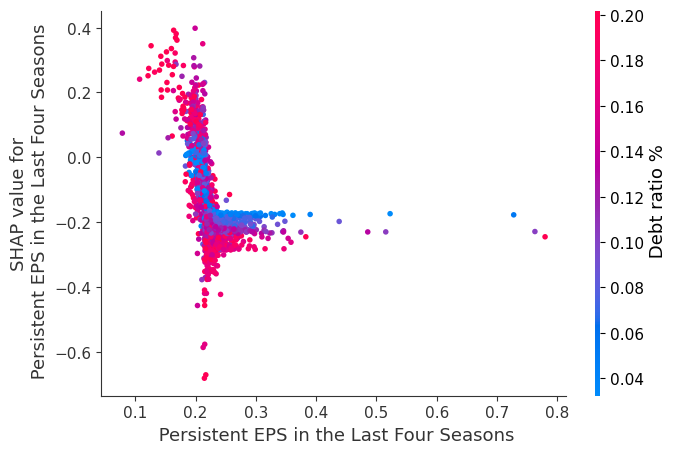

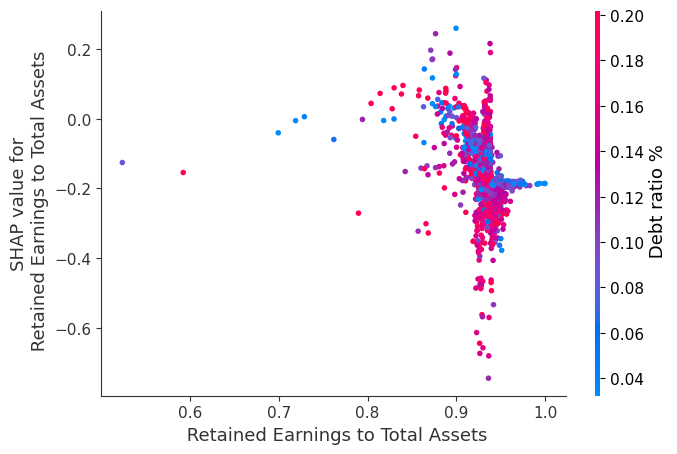

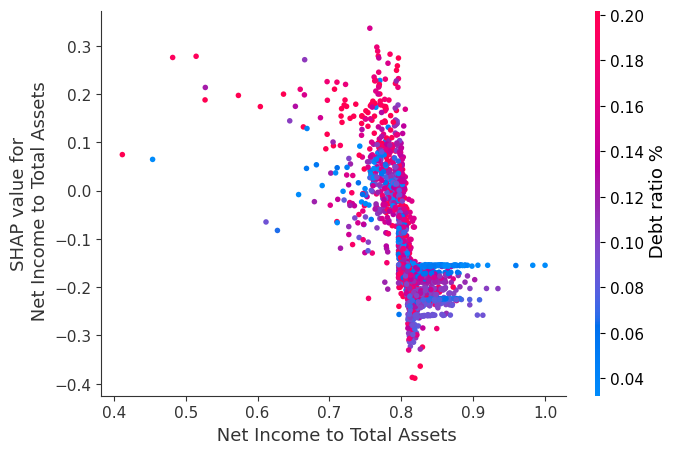

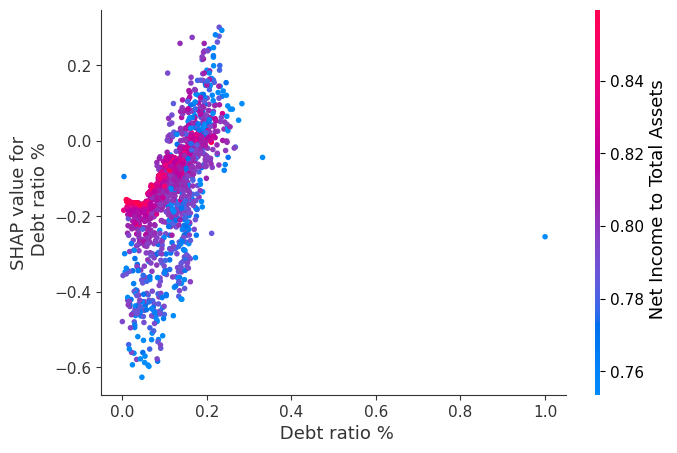

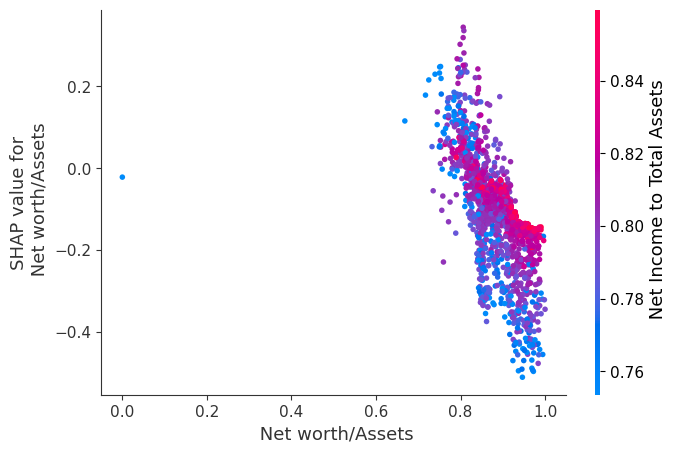

In [54]:
#SHAP dependence plots for each of the top 5 features
for feature in top_5_features:
    shap.dependence_plot(feature, shap_values_RF, X_test)

## XGBoost

In [55]:
#XGBoost classifier
model_xgb = XGBClassifier(n_estimators=100, objective='binary:logistic', random_state=42)

In [56]:
#Applying Grid Search to find the best model and the best parameters

parameters = {'max_depth': [3, 5, 7],
              'min_child_weight': [1, 3, 5],
              'subsample': [0.6, 0.8, 1.0],
              'colsample_bytree': [0.6, 0.8, 1.0],
              'learning_rate': [0.01, 0.1, 0.3]}

grid_search_xgb = GridSearchCV(estimator = model_xgb,
                           param_grid = parameters,
                           scoring = 'precision',
                           cv = 3,
                           verbose = 2,
                           n_jobs = -1)

grid_search_xgb.fit(X_train, y_train)
best_precision_xgb = grid_search_xgb.best_score_
best_parameters_xgb = grid_search_xgb.best_params_

print("Best precision: {:.2f} %".format(best_precision_xgb*100))
print("Best Parameters:", best_parameters_xgb)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best precision: 92.50 %
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 1.0}


## XGBoost Instantiation

In [57]:
# Training XGBoost with the best parameters
model_xgb = XGBClassifier(n_estimators = 100, 
                          objective = 'binary:logistic',
                          colsample_bytree = best_parameters_xgb['colsample_bytree'],
                          learning_rate = best_parameters_xgb['learning_rate'],
                          max_depth = best_parameters_xgb['max_depth'],
                          min_child_weight = best_parameters_xgb['min_child_weight'],
                          subsample = best_parameters_xgb['subsample'],
                          random_state = 42)

model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

## Evaluation Matrics 

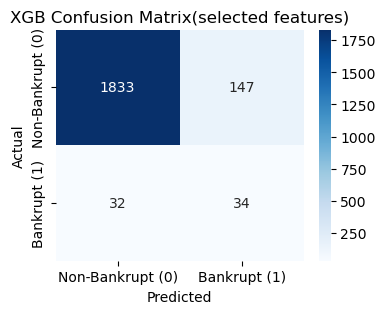

In [58]:
#Making the Confusion Matrix
y_pred_xgb = model_xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred_xgb)

#the confusion matrix using Seaborn heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Bankrupt (0)", "Bankrupt (1)"], 
            yticklabels=["Non-Bankrupt (0)", "Bankrupt (1)"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGB Confusion Matrix(selected features)')
plt.show()

In [59]:
# Model evaluation with classification report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1980
           1       0.19      0.52      0.28        66

    accuracy                           0.91      2046
   macro avg       0.59      0.72      0.61      2046
weighted avg       0.96      0.91      0.93      2046



In [60]:
# Model evaluation with ROC AUC & PR AUC

# Predicting on the test set
y_pred_prob = model_xgb.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.3f}")

# Precision-Recall Curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.3f}")

ROC-AUC Score: 0.887
Precision-Recall AUC: 0.269


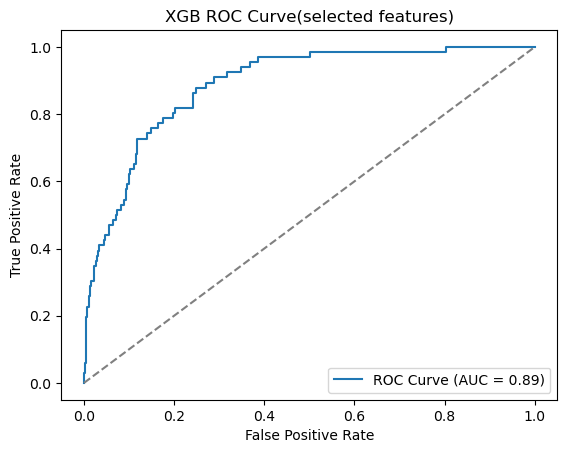

In [61]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random Guessing Line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB ROC Curve(selected features)')
plt.legend()
plt.show()

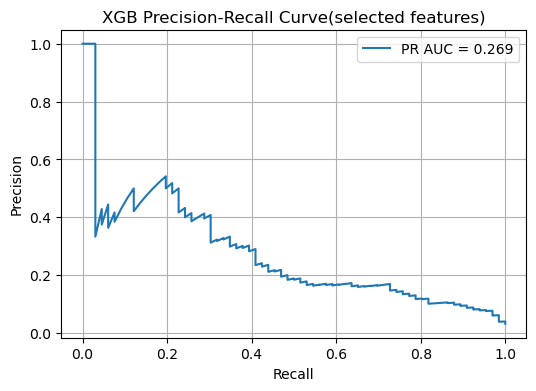

In [62]:
#Precision-Recall Curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("XGB Precision-Recall Curve(selected features)")
plt.legend()
plt.grid()
plt.show()

## k-Fold Cross-Validation

In [63]:
# Defining k-Fold Cross-Validation
k = 10
cv = KFold(n_splits=k, shuffle=True, random_state=42)

# Performing k-Fold Cross-Validation
cv_scores = cross_val_score(estimator=model_xgb, X=X_train, y=y_train, cv=cv, scoring = 'recall')

# Computing Mean & Standard Deviation
mean_score = np.mean(cv_scores)
std_dev = np.std(cv_scores)

print(f'recall: {mean_score:.4f} ± {std_dev:.4f}')

recall: 0.9686 ± 0.0049


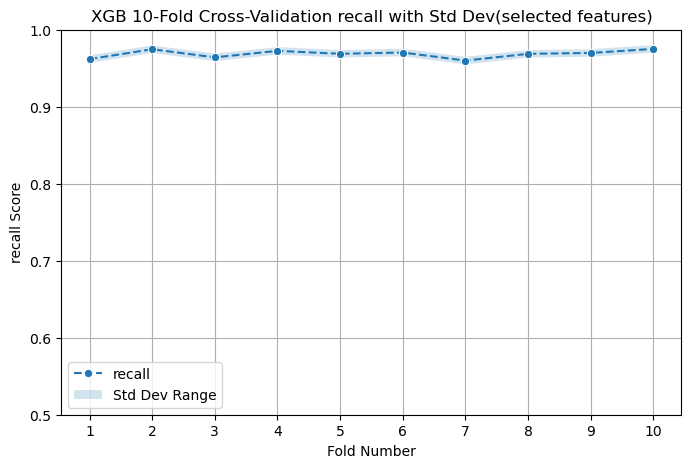

In [64]:
# Plotting recall scores with Standard Deviation
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, k+1), y=cv_scores, marker="o", linestyle="dashed", label="CV Score")
plt.fill_between(range(1, k+1), cv_scores - std_dev, cv_scores + std_dev, alpha=0.2)

plt.xlabel("Fold Number")
plt.ylabel("recall Score")
plt.title(f"XGB {k}-Fold Cross-Validation recall with Std Dev(selected features)")
plt.xticks(range(1, k+1))
plt.ylim(0.5, 1)
plt.legend(["recall", "Std Dev Range"])
plt.grid()
plt.show()

D:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


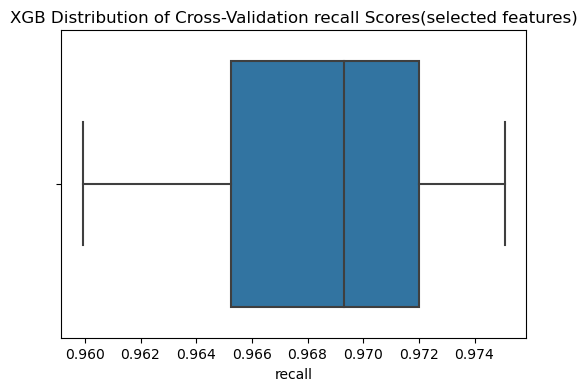

In [65]:
#Box Plot of k-Fold Scores
plt.figure(figsize=(6, 4))
sns.boxplot(cv_scores)
plt.title("XGB Distribution of Cross-Validation recall Scores(selected features)")
plt.xlabel("recall")
plt.show()

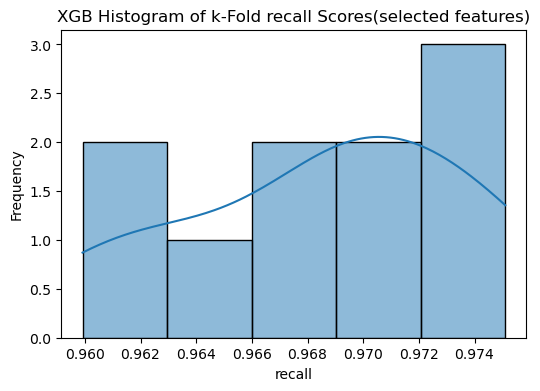

In [66]:
# Histogram of Cross-Validation Scores
plt.figure(figsize=(6, 4))
sns.histplot(cv_scores, bins=5, kde=True)
plt.title("XGB Histogram of k-Fold recall Scores(selected features)")
plt.xlabel("recall")
plt.ylabel("Frequency")
plt.show()

## Use the SHAP explainer to explain predictions

In [67]:
# Tree Explainer object that can calculate shap values
explainer_xgb = shap.TreeExplainer(model_xgb)

## Instance-Level Explanation (Force Plot)

In [68]:
# Creating a mask
sample_xgb_X1 = (y_test == 1) & (y_pred_xgb == 1)

# Extracting the rows from the test dataset where the mask is True
sample_xgb_1 = X_test[sample_xgb_X1]

print(sample_xgb_1)

       Persistent EPS in the Last Four Seasons  \
3183                                  0.179824   
4788                                  0.195424   
1179                                  0.166210   
2023                                  0.213009   
1951                                  0.143992   
2046                                  0.216886   
1759                                  0.201002   
1753                                  0.122341   
5070                                  0.151744   
715                                   0.179257   
1867                                  0.186064   
5                                     0.174435   
2344                                  0.211024   
2001                                  0.190224   
4917                                  0.197315   
525                                   0.177271   
6105                                  0.189468   
3749                                  0.154392   
4492                                  0.163184   


In [69]:
#choosing some instances from the test dataset
X_test.loc[[3183]]

Persistent EPS in the Last Four Seasons  \
3183                                  0.179824   

       Per Share Net profit before tax (Yuan Â¥)   Debt ratio %  \
3183                                    0.147548       0.189618   

       Net worth/Assets   Net profit before tax/Paid-in capital  \
3183           0.810382                                0.150019   

       Retained Earnings to Total Assets   Net Income to Total Assets  
3183                            0.908377                      0.75613

In [70]:
# Calculating Shap values
selected_instance_xgb1 = X_test.loc[[3183]]
shap_values_xgb1 = explainer_xgb.shap_values(selected_instance_xgb1)
shap.initjs()
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb1[0], selected_instance_xgb1)

In [71]:
# Creating a mask
sample_xgb_X2 = (y_test == 0) & (y_pred_xgb == 1)

# Extracting the rows from the test dataset where the mask is True
sample_xgb_2 = X_test[sample_xgb_X2]

print(sample_xgb_2)

       Persistent EPS in the Last Four Seasons  \
2646                                  0.199489   
6280                                  0.191264   
3898                                  0.198639   
5072                                  0.221424   
4227                                  0.142384   
...                                        ...   
2017                                  0.211780   
5017                                  0.152501   
13                                    0.212915   
6648                                  0.196937   
983                                   0.221140   

       Per Share Net profit before tax (Yuan Â¥)   Debt ratio %  \
2646                                    0.159373       0.214560   
6280                                    0.150712       0.190162   
3898                                    0.157490       0.172234   
5072                                    0.180086       0.147293   
4227                                    0.113956       0.283067 

In [72]:
#choosing some instances from the test dataset to understand to the classifier makes predictions for them.
X_test.loc[[2009]]

Persistent EPS in the Last Four Seasons  \
2009                                  0.159875   

       Per Share Net profit before tax (Yuan Â¥)   Debt ratio %  \
2009                                    0.127137        0.20809   

       Net worth/Assets   Net profit before tax/Paid-in capital  \
2009            0.79191                                0.126122   

       Retained Earnings to Total Assets   Net Income to Total Assets  
2009                            0.827767                     0.526912

In [73]:
# Calculating Shap values
selected_instance_xgb2 = X_test.loc[[2009]]
shap_values_xgb2 = explainer_xgb.shap_values(selected_instance_xgb2)
shap.initjs()
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb2[0], selected_instance_xgb2)

## Global Feature Importance

### Summary Plot

In [74]:
# Calculating SHAP values for the test dataset
shap_values_xgb = explainer_xgb.shap_values(X_test)

In [75]:
# If shap_values_xgb is a list of 2 arrays (one for each class)
if isinstance(shap_values_xgb, list) and len(shap_values_xgb) == 2:
    shap_values_xgb = shap_values_xgb[1] - shap_values_xgb[0]  # Convert per-class SHAP values to single array
else:
    shap_values_xgb = np.array(shap_values_xgb)  # In case it's already in the correct format

# Checking the shape to verify it matches the first representation
print("Converted SHAP Values Shape:", shap_values_xgb.shape)

Converted SHAP Values Shape: (2046, 7)


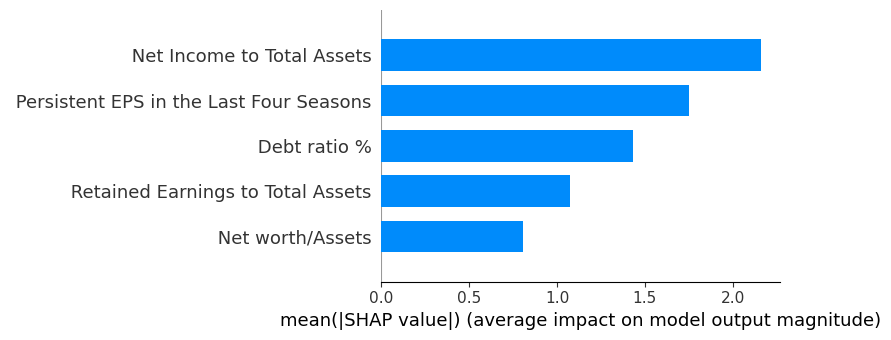

In [76]:
# the top 5 features based on their importance (mean SHAP value or other metric)
top_5_features = np.abs(shap_values_xgb).mean(axis=0).argsort()[-5:][::-1]

# the summary plot for the top 5 features only
shap.summary_plot(shap_values_xgb[:, top_5_features], X_test.iloc[:, top_5_features], plot_type="bar")

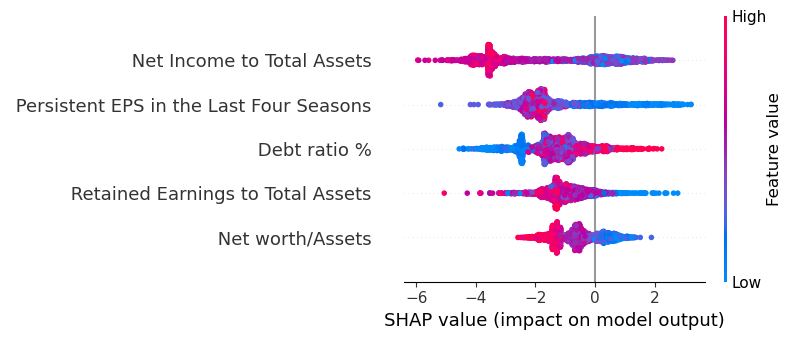

In [77]:
#summary pot for feature distribution
shap.summary_plot(shap_values_xgb[:, top_5_features], X_test.iloc[:, top_5_features])

## SHAP dependence plot

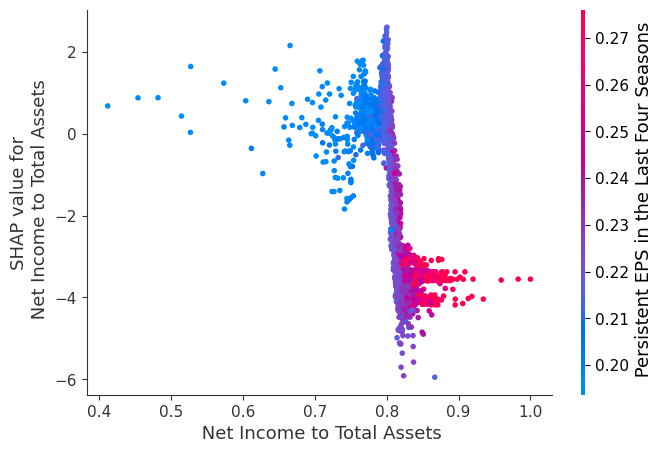

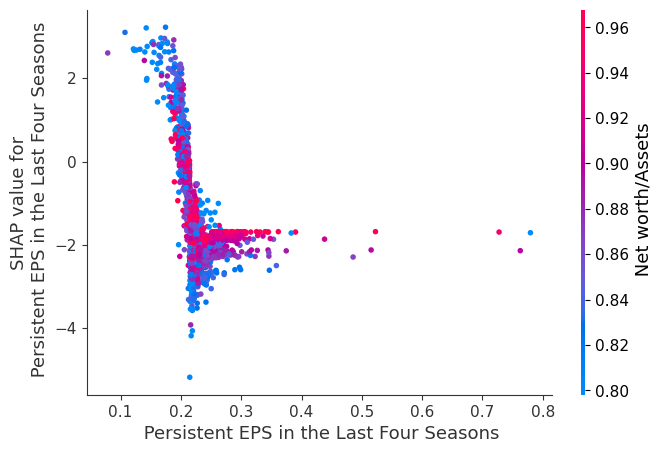

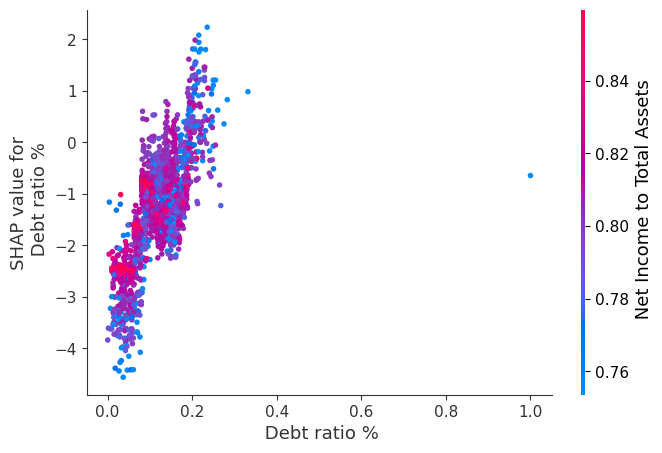

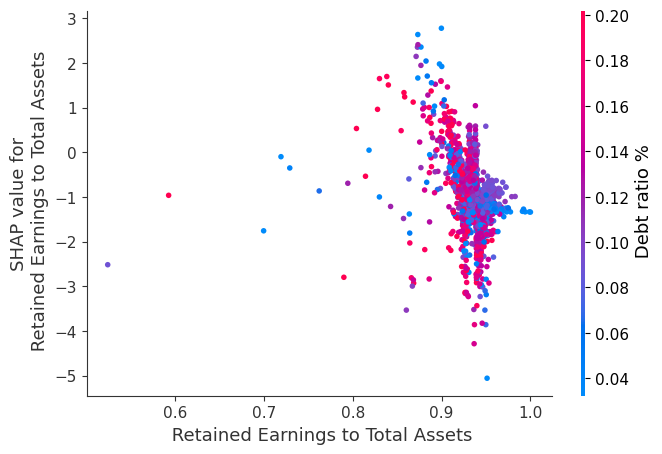

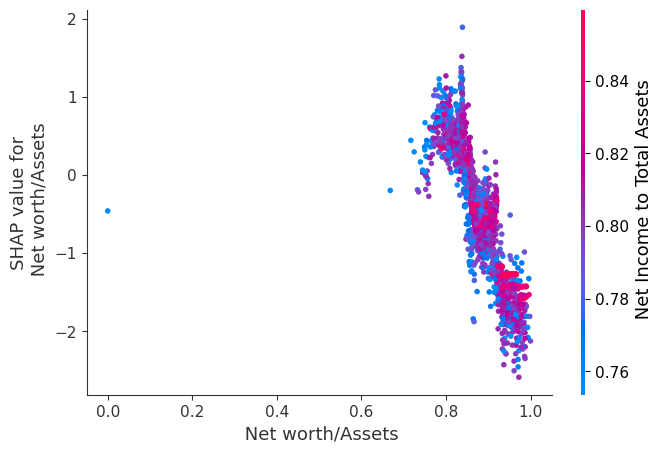

In [78]:
# SHAP dependence plots for each of the top 5 features
for feature in top_5_features:
    shap.dependence_plot(feature, shap_values_xgb, X_test)

## LightGBM

In [79]:
# Defining LightGBM classifier
model_lgbm = LGBMClassifier(n_estimators=100, objective='binary', random_state=42)

In [80]:
#Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [3, 5, 7],
    'num_leaves': [20, 31, 40],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Performing Grid Search
grid_search_lgbm = GridSearchCV(
    estimator=model_lgbm,
    param_grid=parameters,
    scoring='precision',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_lgbm.fit(X_train, y_train)
best_precision_lgbm = grid_search_lgbm.best_score_
best_parameters_lgbm = grid_search_lgbm.best_params_

print("Best precision for LightGBM: {:.2f} %".format(best_precision_lgbm * 100))
print("Best Parameters for LightGBM:", best_parameters_lgbm)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4619, number of negative: 4619
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 9238, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

## LightGBM Instantiation

In [81]:
# Training LightGBM with the best parameters
model_lgbm = LGBMClassifier(
    n_estimators=100,
    max_depth=best_parameters_lgbm['max_depth'],
    num_leaves=best_parameters_lgbm['num_leaves'],
    learning_rate=best_parameters_lgbm['learning_rate'],
    subsample=best_parameters_lgbm['subsample'],
    colsample_bytree=best_parameters_lgbm['colsample_bytree'],
    random_state=42
)

model_lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4619, number of negative: 4619
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006717 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 9238, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.3, max_depth=7,
               num_leaves=40, random_state=42, subsample=0.6)

## Evaluation Matrics 

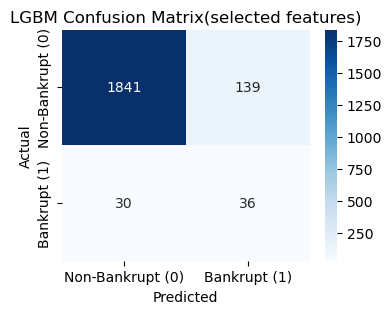

In [82]:
#Making the Confusion Matrix
y_pred_lgbm = model_lgbm.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lgbm)

# the confusion matrix using Seaborn heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Bankrupt (0)", "Bankrupt (1)"], 
            yticklabels=["Non-Bankrupt (0)", "Bankrupt (1)"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LGBM Confusion Matrix(selected features)')
plt.show()

In [83]:
# Model evaluation with classification report
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1980
           1       0.21      0.55      0.30        66

    accuracy                           0.92      2046
   macro avg       0.59      0.74      0.63      2046
weighted avg       0.96      0.92      0.93      2046



In [84]:
# Predicting on the test set
y_pred_prob = model_lgbm.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.3f}")

# Precision-Recall Curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.3f}")

ROC-AUC Score: 0.880
Precision-Recall AUC: 0.267


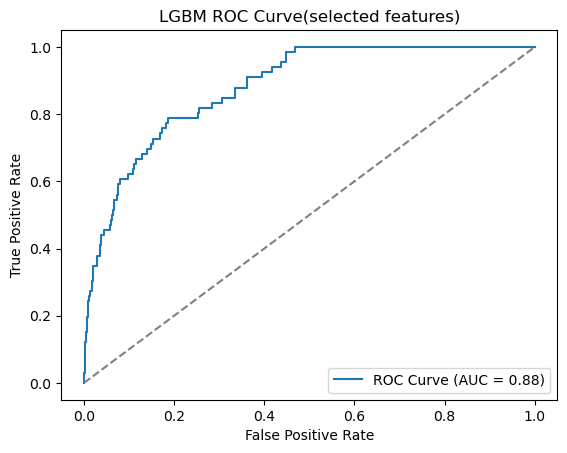

In [85]:
# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random Guessing Line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LGBM ROC Curve(selected features)')
plt.legend()
plt.show()

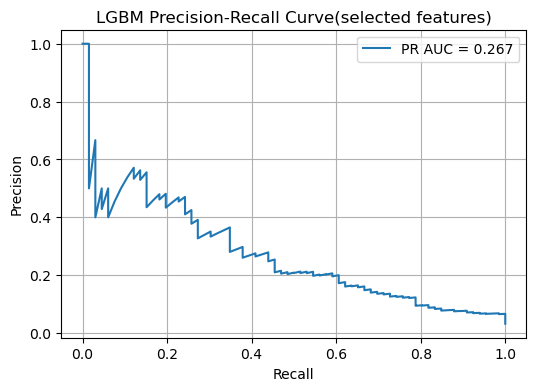

In [86]:
# Precision-Recall AUC Curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("LGBM Precision-Recall Curve(selected features)")
plt.legend()
plt.grid()
plt.show()

In [87]:
# Defining k-Fold Cross-Validation
k = 10
cv = KFold(n_splits=k, shuffle=True, random_state=42)

# Performing k-Fold Cross-Validation
cv_scores = cross_val_score(estimator=model_lgbm, X=X_train, y=y_train, cv=cv, scoring = 'recall')

# Computing Mean & Standard Deviation
mean_score = np.mean(cv_scores)
std_dev = np.std(cv_scores)

print(f'recall: {mean_score:.4f} ± {std_dev:.4f}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4147, number of negative: 4167
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006916 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 8314, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498797 -> initscore=-0.004811
[LightGBM] [Info] Start training from score -0.004811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4182, number of negative: 4132
[LightGBM] [Info] Auto-cho

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4188, number of negative: 4127
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [In

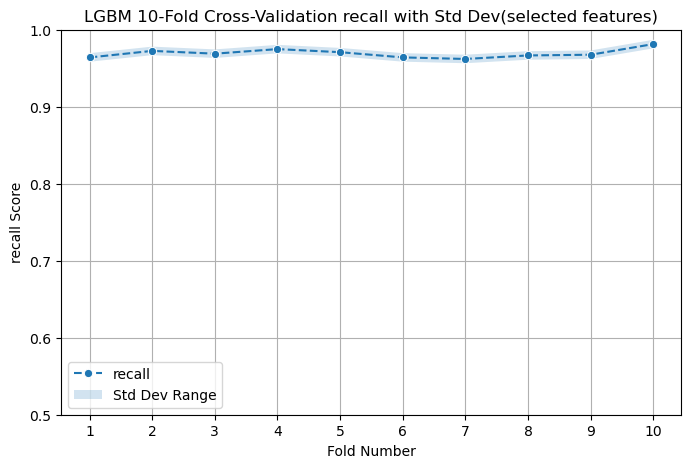

In [88]:
# Recall Scores with Standard Deviation
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, k+1), y=cv_scores, marker="o", linestyle="dashed", label="CV Score")
plt.fill_between(range(1, k+1), cv_scores - std_dev, cv_scores + std_dev, alpha=0.2)

plt.xlabel("Fold Number")
plt.ylabel("recall Score")
plt.title(f"LGBM {k}-Fold Cross-Validation recall with Std Dev(selected features)")
plt.xticks(range(1, k+1))
plt.ylim(0.5, 1)
plt.legend(["recall", "Std Dev Range"])
plt.grid()
plt.show()

D:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


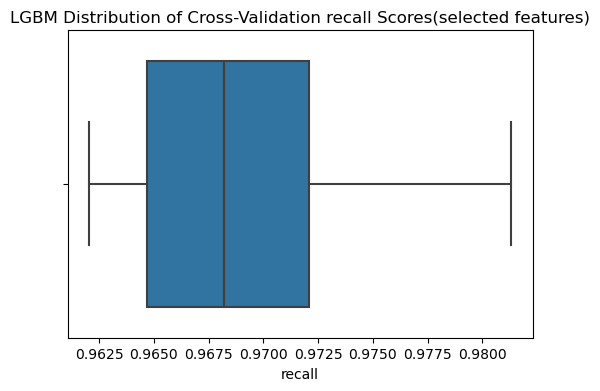

In [89]:
#Box Plot of k-Fold Scores
plt.figure(figsize=(6, 4))
sns.boxplot(cv_scores)
plt.title("LGBM Distribution of Cross-Validation recall Scores(selected features)")
plt.xlabel("recall")
plt.show()

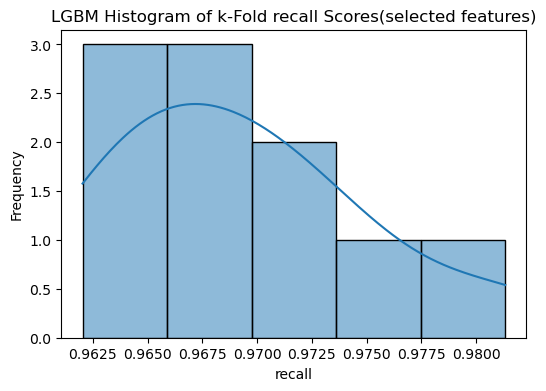

In [90]:
# Histogram of Cross-Validation Scores
plt.figure(figsize=(6, 4))
sns.histplot(cv_scores, bins=5, kde=True)
plt.title("LGBM Histogram of k-Fold recall Scores(selected features)")
plt.xlabel("recall")
plt.ylabel("Frequency")
plt.show()

## Use the SHAP explainer to explain predictions

In [91]:
# Tree Explainer object that can calculate shap values
explainer_lgbm = shap.TreeExplainer(model_lgbm)

## Instance-Level Explanation (Force Plot)

In [92]:
# Creating a mask
sample_lgbm_X1 = (y_test == 1) & (y_pred_lgbm == 1)

# Extracting the rows from the test dataset where the mask is True
sample_lgbm_1 = X_test[sample_lgbm_X1]

print(sample_lgbm_1)

       Persistent EPS in the Last Four Seasons  \
3183                                  0.179824   
5148                                  0.215278   
4788                                  0.195424   
1179                                  0.166210   
527                                   0.189468   
2023                                  0.213009   
1951                                  0.143992   
2046                                  0.216886   
106                                   0.214617   
1759                                  0.201002   
1753                                  0.122341   
5070                                  0.151744   
715                                   0.179257   
1867                                  0.186064   
5                                     0.174435   
2344                                  0.211024   
2001                                  0.190224   
4917                                  0.197315   
525                                   0.177271   


In [93]:
#choosing some instances from the test dataset
X_test.loc[[3183]]

Persistent EPS in the Last Four Seasons  \
3183                                  0.179824   

       Per Share Net profit before tax (Yuan Â¥)   Debt ratio %  \
3183                                    0.147548       0.189618   

       Net worth/Assets   Net profit before tax/Paid-in capital  \
3183           0.810382                                0.150019   

       Retained Earnings to Total Assets   Net Income to Total Assets  
3183                            0.908377                      0.75613

In [94]:
# Calculate Shap values
selected_instance_lgbm1 = X_test.loc[[3183]]
shap_values_lgbm1 = explainer_lgbm.shap_values(selected_instance_lgbm1)
shap.initjs()
shap.force_plot(explainer_lgbm.expected_value, shap_values_lgbm1[0], selected_instance_lgbm1)

D:\Python\lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


In [95]:
# Creating a mask
sample_lgbm_X2 = (y_test == 0) & (y_pred_lgbm == 1)

# Extract the rows from the test dataset where the mask is True
sample_lgbm_2 = X_test[sample_lgbm_X2]

print(sample_lgbm_2)

       Persistent EPS in the Last Four Seasons  \
6280                                  0.191264   
3898                                  0.198639   
2141                                  0.223315   
4227                                  0.142384   
4270                                  0.203839   
...                                        ...   
5090                                  0.235322   
2017                                  0.211780   
5017                                  0.152501   
6648                                  0.196937   
983                                   0.221140   

       Per Share Net profit before tax (Yuan Â¥)   Debt ratio %  \
6280                                    0.150712       0.190162   
3898                                    0.157490       0.172234   
2141                                    0.177600       0.146235   
4227                                    0.113956       0.283067   
4270                                    0.160578       0.108263 

In [96]:
#choosing some instances from the test dataset 
X_test.loc[[2646]]

Persistent EPS in the Last Four Seasons  \
2646                                  0.199489   

       Per Share Net profit before tax (Yuan Â¥)   Debt ratio %  \
2646                                    0.159373        0.21456   

       Net worth/Assets   Net profit before tax/Paid-in capital  \
2646            0.78544                                0.158397   

       Retained Earnings to Total Assets   Net Income to Total Assets  
2646                            0.903069                     0.710384

In [97]:
# Calculating Shap values
selected_instance_lgbm2 = X_test.loc[[2646]]
shap_values_lgbm2 = explainer_lgbm.shap_values(selected_instance_lgbm2)
shap.initjs()
shap.force_plot(explainer_lgbm.expected_value, shap_values_lgbm2[0], selected_instance_lgbm2)

D:\Python\lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


## Global Feature Importance

### Summary Plot

In [98]:
# SHAP values for the test dataset
shap_values_lgbm = explainer_lgbm.shap_values(X_test)

In [99]:
# If shap_values_xgb is a list of 2 arrays (one for each class)
if isinstance(shap_values_lgbm, list) and len(shap_values_lgbm) == 2:
    shap_values_lgbm = shap_values_lgbm[1] - shap_values_lgbm[0]  # Convert per-class SHAP values to single array
else:
    shap_values_lgbm = np.array(shap_values_lgbm)  # In case it's already in the correct format

# Checing the shape to verify it matches the first representation
print("Converted SHAP Values Shape:", shap_values_lgbm.shape)

Converted SHAP Values Shape: (2046, 7)


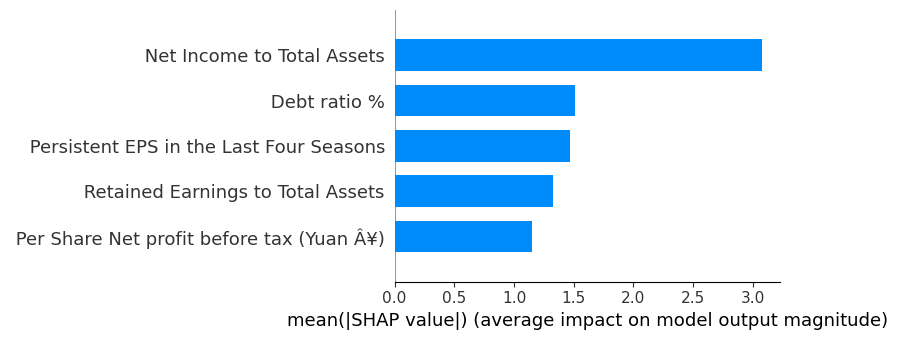

In [100]:
# the top 5 features based on their importance (mean SHAP value or other metric)
top_5_features = np.abs(shap_values_lgbm).mean(axis=0).argsort()[-5:][::-1]

# the summary plot for the top 5 features only
shap.summary_plot(shap_values_lgbm[:, top_5_features], X_test.iloc[:, top_5_features], plot_type="bar")

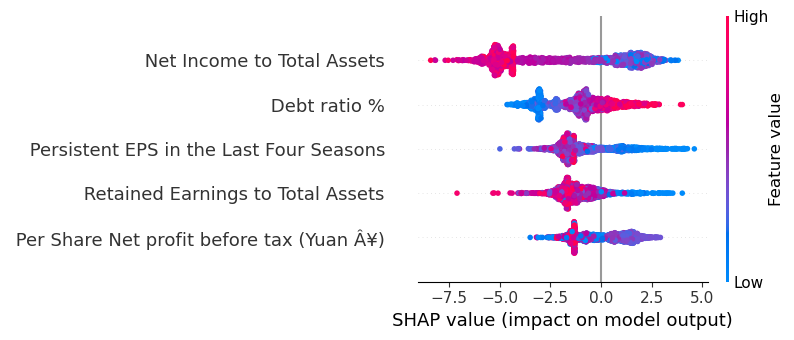

In [101]:
#summary plot for feature distribution
shap.summary_plot(shap_values_lgbm[:, top_5_features], X_test.iloc[:, top_5_features])

## SHAP dependence plot

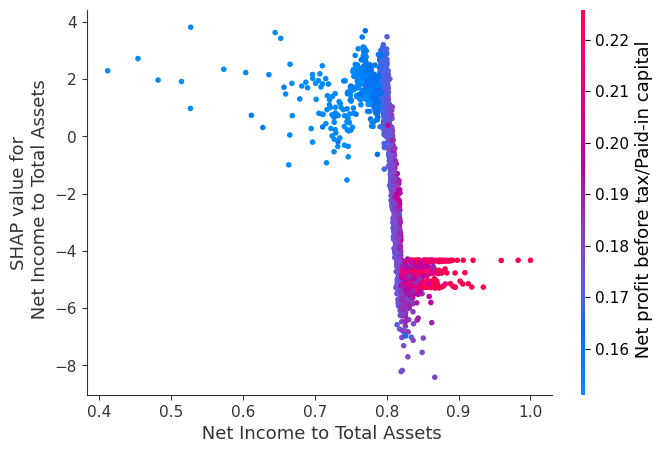

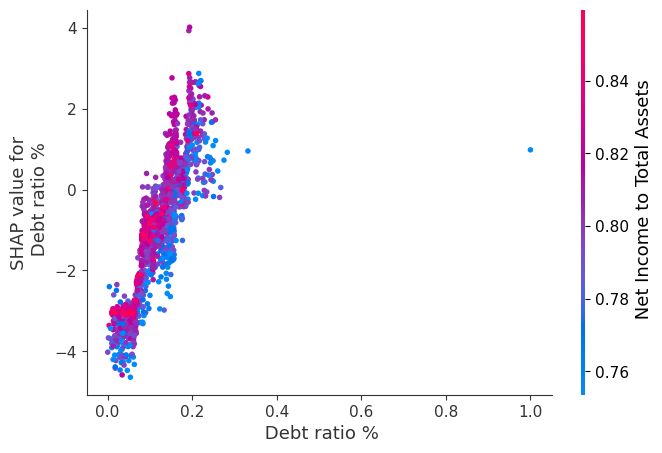

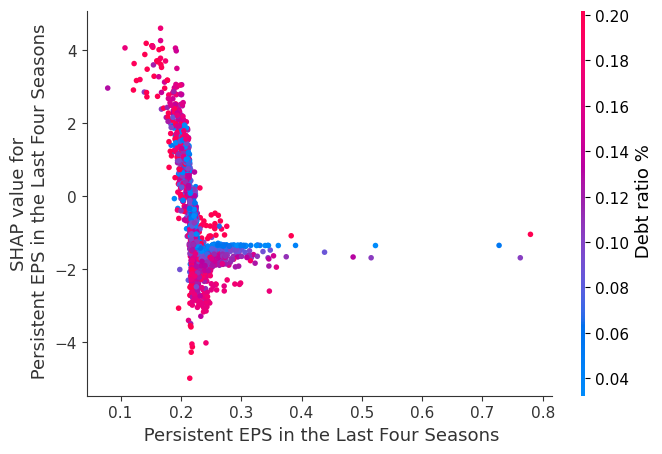

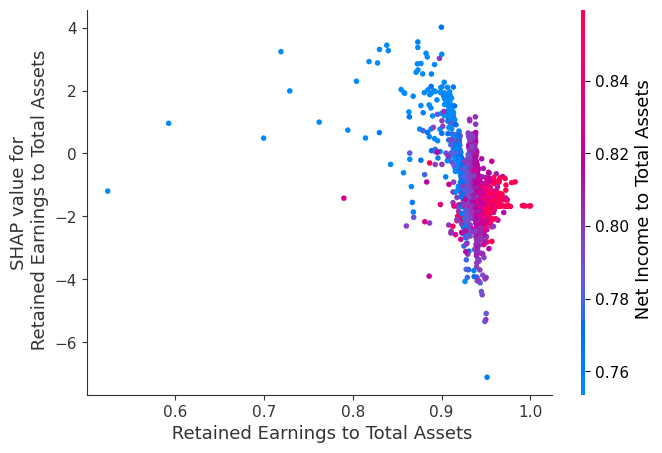

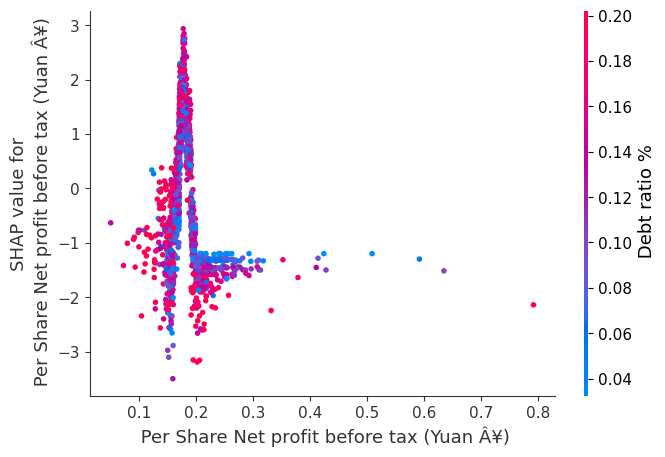

In [102]:
# SHAP dependence plots for each of the top 5 features
for feature in top_5_features:
    shap.dependence_plot(feature, shap_values_lgbm, X_test)